In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Number of variables in the dataset : ", df.shape[1],
      "\nThey are : ",df.columns.values)

Number of variables in the dataset :  14 
They are :  ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Correlation matrix
corrmat = df.corr()
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [37]:
#corr with target
data_corr = corrmat['target'][:-1].sort_values(ascending=False)

data_corr

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

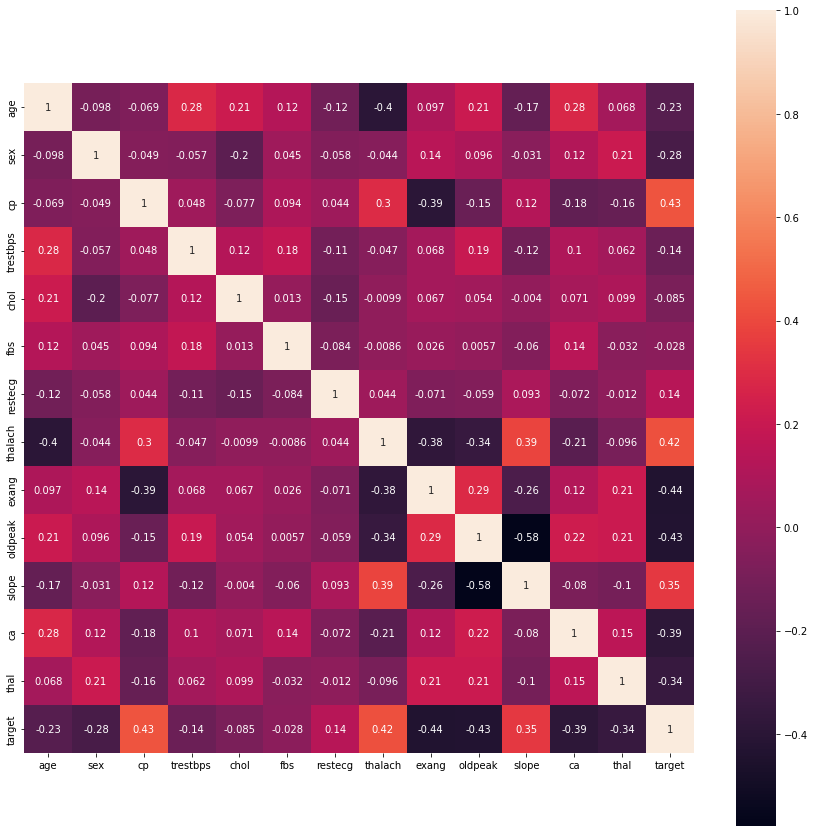

In [42]:
#Correlation map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,square=True) 
plt.show()

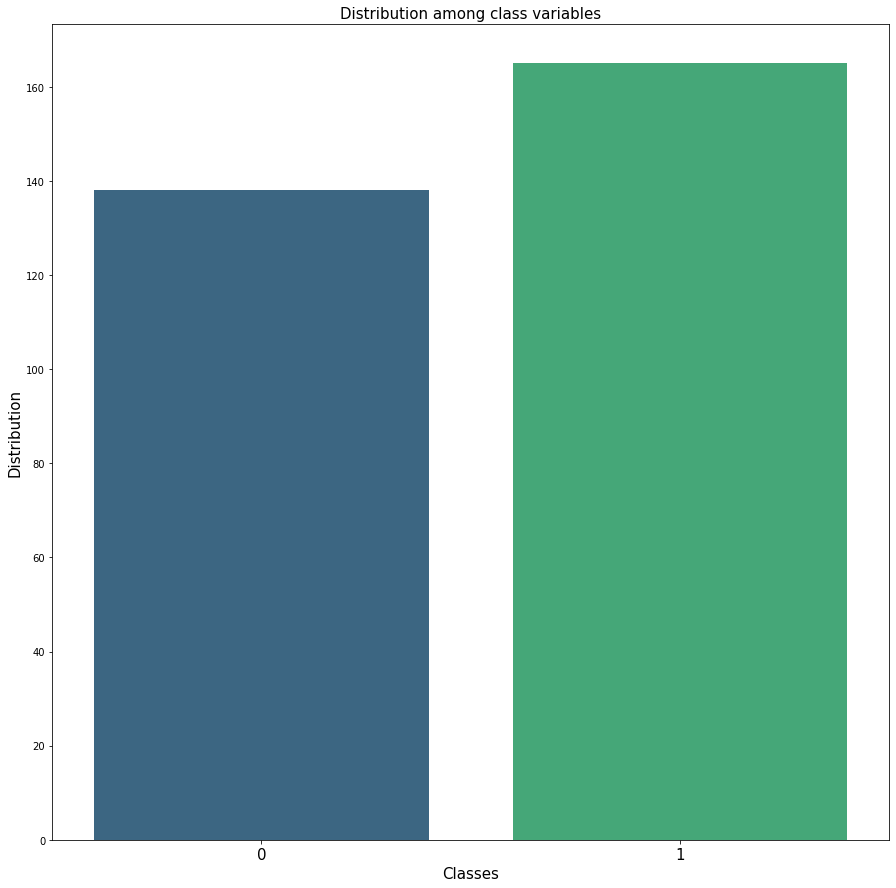

In [44]:
plt.figure(figsize=(15,15))

sns.countplot(x ='target', data = df, palette = 'viridis')

plt.title('Distribution among class variables', fontsize = 15)
plt.xlabel('Classes', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.xticks(fontsize = 15)

# Show the plot
plt.show()

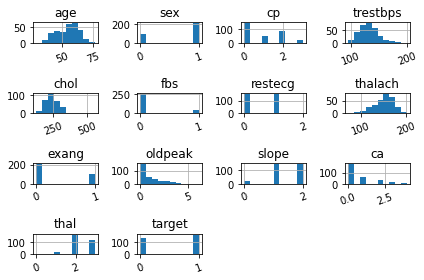

In [46]:

# Histogram shows the distribution of each feature
df.hist(xrot = 20, )
plt.tight_layout()
plt.show()  

In [ ]:
sns.pairplot(data=df, hue="class")
plt.show()


### Train

In [49]:
X = df.drop(['target'],axis=1)
y = df['target']

In [50]:
#Normalize
X_norm = (X-X.min())/(X.max()-X.min())
y_norm = (y-y.min())/(y.max()-y.min())

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.5737704918032787 


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)
print(" {} nn score: {} ".format(5,knn.score(x_test,y_test)))

 5 nn score: 0.6065573770491803 


In [54]:
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
print(score_list)

[0.6229508196721312, 0.5245901639344263, 0.5737704918032787, 0.5901639344262295, 0.6065573770491803, 0.5901639344262295, 0.639344262295082, 0.5737704918032787, 0.639344262295082, 0.5901639344262295, 0.6065573770491803, 0.6065573770491803, 0.6229508196721312, 0.5901639344262295, 0.639344262295082, 0.639344262295082, 0.6065573770491803, 0.5901639344262295, 0.639344262295082]


In [56]:
current_max = score_list[0]
for i in range(len(score_list)):
    if current_max < score_list[i]:
        current_max = score_list[i]
print(current_max)

0.639344262295082


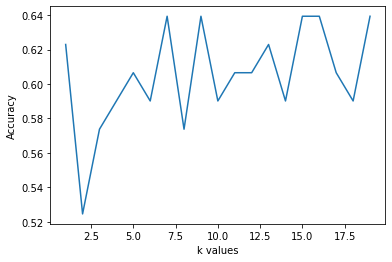

In [57]:
plt.plot(range(1,20),score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

In [58]:
knn3 = KNeighborsClassifier(n_neighbors = 8) #k value
knn3.fit(x_train, y_train)
print(" {} nn score: {} ".format(8,knn3.score(x_test,y_test)))

 8 nn score: 0.5737704918032787 


In [59]:
y_pred_knn = knn3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("KNN result confusion matrix : \n", cm)

KNN result confusion matrix : 
 [[13 11]
 [15 22]]


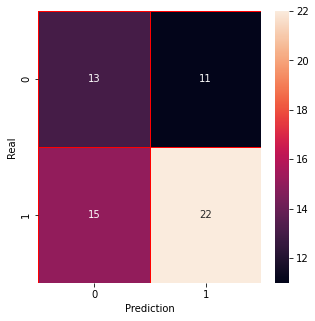

In [60]:
# Confusion matrix
figure, axes = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=axes)
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("test score with naive bayes: ", nb.score(x_test,y_test))

test score with naive bayes:  0.8688524590163934


In [64]:
y_pred_nb = nb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nb)
print("NB result confusion matrix : \n", cm)

NB result confusion matrix : 
 [[21  3]
 [ 5 32]]


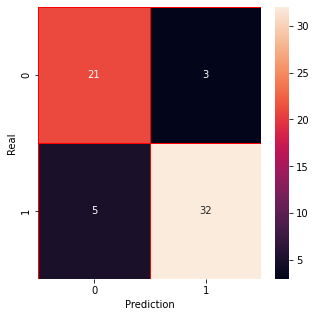

In [65]:
#confusion metrics visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.91      0.86      0.89        37

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix : 
 [[21  3]
 [ 5 32]]


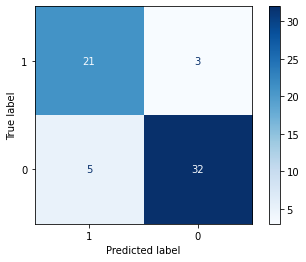

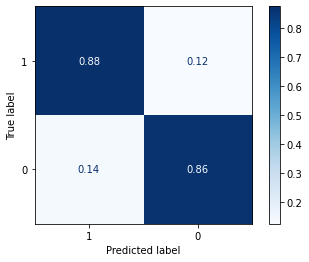

In [72]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred_nb))

class_names = df.target.unique()

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

nb_acc = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the model : ", nb_acc)

Accuracy of the model :  0.8688524590163934
